# TimeShop Demonstration

In [2]:
#general
import sys

#audio
from IPython.display import Audio
import scipy.io.wavfile as wf

#data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# timeatlas
from timeatlas import TimeSeriesDarts

#ploting
import matplotlib.pyplot as plt
plt.style.use('seaborn')


                   when         what       how
                    |            |         |
    ts.edit().<selector>().<verb>().<executor>()
    
    

### Loading the Data

For this demonstration we are loading the famous auditory Illusion.

Later we will apply a few common audio errors to the file using the TimeShop() object from the TimeAtlas library.

In [3]:
sound_file = './Laurel.wav'
Audio(sound_file)

Now we convert the audiofile into a pandas.DataFrame(). Further we are only using one channel of the audio, since for the demonstration a multivariate anomaly injection is not needed.

It is noteworthy that the timestamps within the DataFrame have e delta of 1 second. The audiofile is much shorter but the underlying data object from darts is not handling the rate of the audiofile well.

In [4]:
rate, data = wf.read(sound_file)

/Users/lorenz/.local/share/virtualenvs/timeatlas-kzsAXcI_/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [5]:
df = pd.DataFrame(data=data[:,0], columns=["Channel 1"])
df.index = pd.to_datetime(pd.date_range(start = '2021-08-13 00:00:00', periods=len(df), freq='s'))

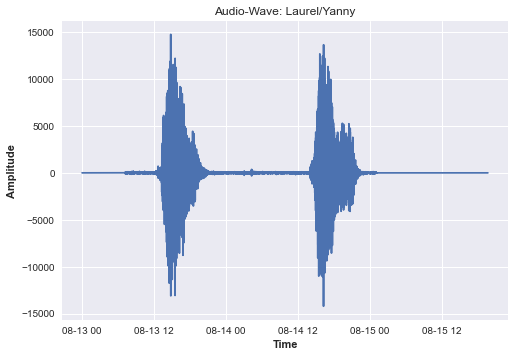

In [6]:
plt.plot(df)
plt.title("Audio-Wave: Laurel/Yanny")
plt.xlabel("Time")
plt.ylabel("Amplitude");


In [7]:
ts = TimeSeriesDarts.from_dataframe(df)

A little helper function to save the changed TimeSeries object into a audiofile. 

- ts: TimeSeries object
- name: filename

In [8]:
def create_wav(ts, name): 
    tmp = ts.pd_dataframe()["Channel 1"].values.astype(np.int16)
    wf.write(rate=rate, data=tmp, filename=f"{name}.wav")

## Create Change Point

First we want to change the amplitue of the audio in a given strech of it to a fixed level.
The workflow is the following:

#### 1. We create a TimeShop() object

In [9]:
tss = ts.edit()

Plotting the time series is also easy

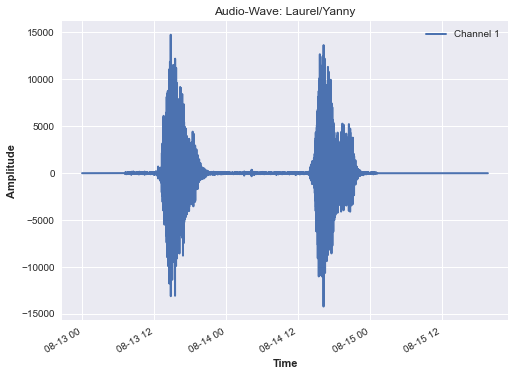

In [10]:
tss.plot()
plt.title("Audio-Wave: Laurel/Yanny")
plt.xlabel("Time")
plt.ylabel("Amplitude");


#### 2. We select a part of the original time series that we want to work on.

In [11]:
tss.select(other=tss.time_series, start_time='2021-08-13 08:00:00', end_time='2021-08-13 15:00:00')

#### 3. We transform the selected part to a flattened sigal at a fixed value (if no value is given the first value of the selected part is used)

In [12]:
tss.flatten(value=30000)

#### 4. We chose the mode on how we want to put the selected and modified part back into the time series

In [13]:
tss.replace()

Now we have a new time series with the modified part back integrated into it. The added part is automatially highlighted in red

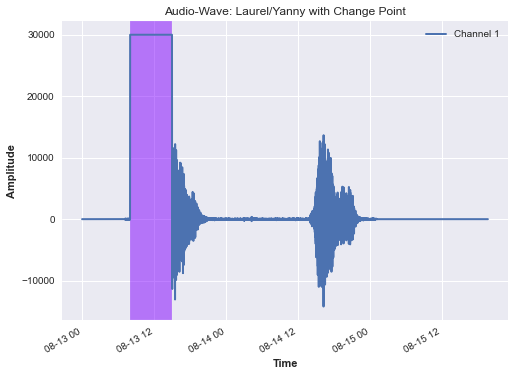

In [14]:
tss.plot()
plt.title("Audio-Wave: Laurel/Yanny with Change Point")
plt.xlabel("Time")
plt.ylabel("Amplitude");

## Create White Noise

Another very common problem with audio is a white noise. We can integrate this very easily using TimeShop(). Here we show the workflow of this process.

#### 1. We create a TimeShop() object

In [15]:
tss = ts.edit()

#### 2. We select a part of the original time series that we want to work on.

In [16]:
tss.select(other=tss.time_series, start_time='2021-08-13 12:00:00', end_time='2021-08-13 23:00:00')

#### 3. We transform the selected part to a white noise signal. We can either fix the mean $\mu$, if we do not select if the mean at every timestep t will be used. Additionally the standart diviation $\sigma$ has to be given.

In [17]:
tss.create_white_noise(sigma=2000)

Here we can have a look at the selected and changed part.

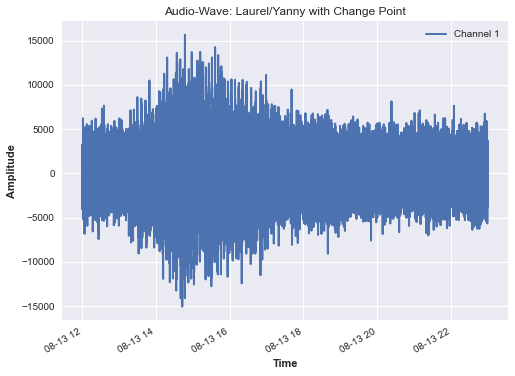

In [18]:
tss.clipboard_plot()
plt.title("Audio-Wave: Laurel/Yanny with Change Point")
plt.xlabel("Time")
plt.ylabel("Amplitude");

#### 4. We chose the mode on how we want to put the selected and modified part back into the time series. For white noise adding with add() is typical.

In [19]:
tss.add()

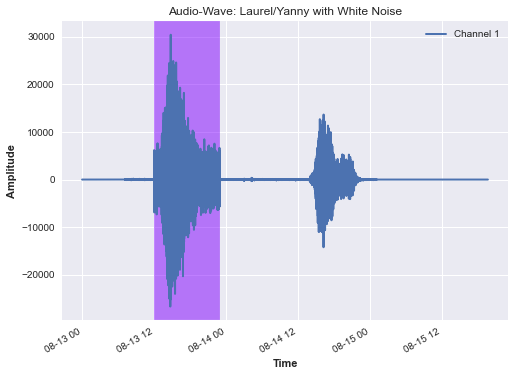

In [20]:
tss.plot()
plt.title("Audio-Wave: Laurel/Yanny with White Noise")
plt.xlabel("Time")
plt.ylabel("Amplitude");

The addition of white noise is not very visible in the plot. We can listen to the audio with the following commands:

In [21]:
create_wav(tss.extract(), "laurel_whitenoise")

In [22]:
sound_file = './laurel_whitenoise.wav'
Audio(sound_file)

## Compress Top and Bottom

Audio compression is a classical problem. Here is the workflow for it.

#### 1. We create a TimeShop() object

In [23]:
tss = ts.edit()

#### 2. We select a part of the original time series that we want to work on. We use threshold_search() with the classical operators and a threshold value.

Note: This function is very slow. A faster version is in the works

In [24]:
tss.threshold_search(threshold=10000, operator=">=")

#### 3. We transform the selected part to a flattened sigal at a fixed value. Here we not specify the value therefore the first value of each selected part is used.

In [25]:
tss.flatten()

#### 4. We chose the mode on how we want to put the selected and modified part back into the time series.

In [26]:
tss.replace()

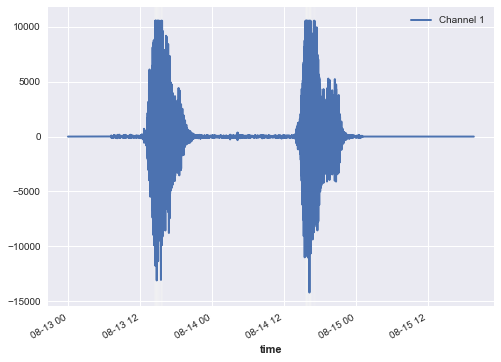

In [27]:
tss.plot()

In [28]:
create_wav(tss.extract(), "laurel_compress")

In [29]:
sound_file = './laurel_compress.wav'
Audio(sound_file)